## Homework 1: Letter Classifier
**Brian Langejans, January 24, 2023**

### Setup

In [1]:
# Import fastai code.
from fastai.vision.all import *

# Set a seed so that the results are the same every time this is run.
set_seed(0, reproducible=True)

In [2]:
# Show what GPU we have.
if torch.cuda.is_available():
    print(torch.cuda.get_device_properties(0))
else:
    print("No CUDA.")

_CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12050MB, multi_processor_count=28)


### Load the data

**Load in the images**

In [3]:
path = untar_data("https://students.cs.calvin.edu/~bel3/344/hw1/images.zip")

**Get image paths**

In [4]:
image_files = get_image_files(path).sorted()

**Get ground-truth labels**

In [5]:
def a_b_or_c(filename):
    if filename[0]=='A':
        return 'A'
    elif filename[0]=='B':
        return 'B'
    else:
        return 'C'

In [6]:
labels = []
for image in image_files:
    labels.append(a_b_or_c(image.name))

**Set up dataloaders**

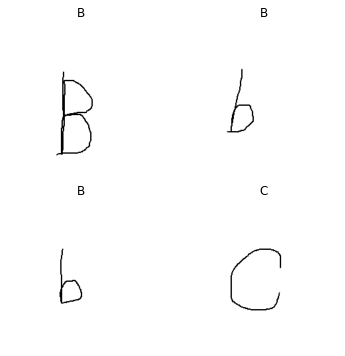

In [7]:
dataloaders = ImageDataLoaders.from_lists(
    path=path, fnames=image_files, labels=labels,
    valid_pct=0.2,
    seed=42,
    bs=4,
    item_tfms=Resize(224)
)

dataloaders.train.show_batch()

In [8]:
print(dataloaders.train.n, "training images")
print(dataloaders.valid.n, "validation images")

80 training images
20 validation images


### Training the Model

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.689156,1.724030,0.650000,0.350000,00:02


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.820446,1.821840,0.550000,0.450000,00:01
1,0.694938,1.040846,0.650000,0.350000,00:01
2,0.563856,0.728832,0.800000,0.200000,00:01
3,0.629904,0.885956,0.800000,0.200000,00:01
4,0.608486,0.968925,0.750000,0.250000,00:01
5,0.592048,0.674199,0.850000,0.150000,00:01
6,0.534637,0.903387,0.850000,0.150000,00:01
7,0.491572,0.894337,0.850000,0.150000,00:01
8,0.419622,0.694514,0.850000,0.150000,00:01
9,0.463837,0.654231,0.850000,0.150000,00:01


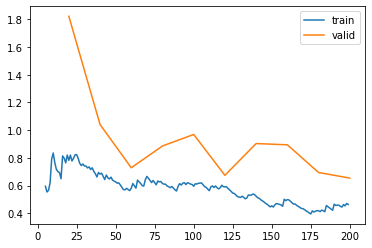

In [9]:
learn = vision_learner(
    dls=dataloaders,
    arch=resnet18,
    metrics=[accuracy, error_rate]
)
learn.fine_tune(epochs=10)
learn.recorder.plot_loss()

### Evaluating Accuracy

**How accurate is the classifier overall?**

The Classifier has an accuracy value of about 0.85, meaning about 15% of predictions are inaccurate.

**Which letter is it most successful at classifying?**

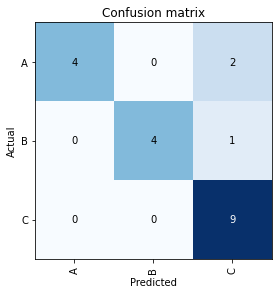

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

According to the confusion matrix above, it seems that C's were the easiest for the classifier to predict, considering it correctly predicted all actual C's. Here is an example:

This is a: C.
Probabilities: TensorBase([3.1264e-05, 1.9082e-05, 9.9995e-01])


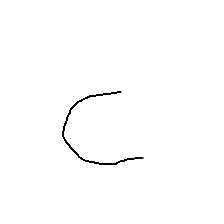

In [11]:
with learn.no_bar():
    prediction, _, probs = learn.predict(PILImage.create(image_files[98]))

print(f"This is a: {prediction}.")
print(f"Probabilities: {probs}")
load_image(image_files[98])

**What mistakes does it make most frequently?**

The modal seemed to mistaken A's for C's most frequently. The first two images below are some examples:

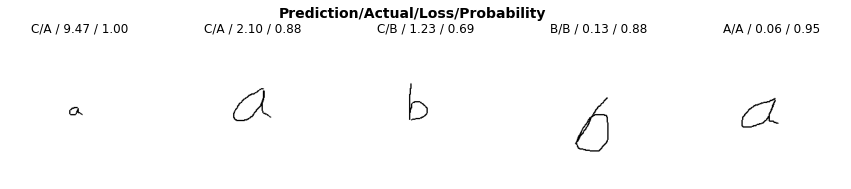

In [12]:
interp.plot_top_losses(5, nrows=1)

**For the previous 3 questions, any ideas about why?**

I'm guessing that C's are the simplest forms to draw, so they must also be the simplest to guess. Some of the A's that it guessed wrong might have had some features of C's, specifically cursive C's, so that could have been the cause.

**Suppose someone else gave you one of their images. How likely do you think your classifier would be to get it right?**

If my classifier were given someone else's images, then based on my results above, I think it would have around 70-80% chance of guessing the letter correctly. I made this slightly lower than the accuracy computed above because there's a good chance the images provided could have used a different method of capturing the letter, like hand-drawing it. This could lead to some uncertainty in my classifier.

**What choices did you have to make in the process of collecting data, processing it, and analyzing the results?**

First, I had to decide the method of data collection. Due to a shortage of time, I decided to collect all of my data through the provided drawing application. Another choice I had to make was how many images to include in each batch. I went with 2 due to the small size of my dataset.

**What are one or two choices that you could have made differently?**

The biggest choice I could have made differently was choosing different methods of data collection. Using only the drawing tool provided definitely impacted the accuracy of my model, and I'd be interested in trying to use more images, or at least images from other sources, like trying different fonts or hand-drawing the images. I could have maybe used other people's hand-drawn images to get different hand-writing samples, since my own hand-writing could have caused some difficulty in the predictions.